In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Estimativas de probabilidades


## Leitura do arquivo

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

adult = pd.read_csv(url, header = None)

adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult.columns = ["age","workclass","finalweight","education",
                 "education-num","martial-status","occupation",
                 "relationship","race","sex","capital-gain",
                 "capital-loss","hours-per-week ","native-country",
                 "income"]

In [4]:
for col in adult.columns:
    if adult[col].dtype == object:
        adult[col] = adult[col].str.strip()

## Boxplot + análise

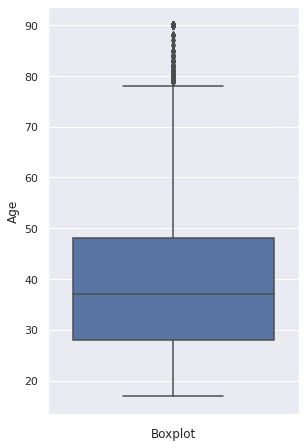

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


In [5]:
sns.set()
plt.figure(figsize = (4.5, 7.5))

sns.boxplot(y = adult.age)
plt.xlabel("Boxplot")
plt.ylabel("Age")
plt.show()
print(adult.age.describe())

### Análise

#### Com o boxplot pode ser verificado o primeiro quartil pouco abaixo de 30, com a função describe podemos ver melhor e afirmar que 25% das pessoas registradas possuem idade inferior a 28. 

#### Já a mediana está um pouco abaixo de 40, mais especificamente em 37, com isso podemos analisar que é esse valor que "divide" nosso dado tendo 50% acima desse valor e 50% abaixo. 

#### No terceiro quartil que está localizado sobre o valor 48 é interessante fazer a analise que possuímos 50% dos nossos registros distribuídos em 20 anos, que é desde o primeiro quartil e o terceiro (48-28=20)

#### Analisando agora por último a média e os outliers, podemos perceber que existem muitos outliers na parte de cima do boxplot e que isso irá refletir no cálculo da média, puxando-a para cima

## Frequência Relativa

### Probabilidade de uma pessoa ter mais de 80 anos (ou seja, Age > 80) dado que tem Salary > 50000.

In [6]:
subset = adult[adult.income == '>50K']
nt_maior50k = len(subset)
nx_maior80yo = len(subset[subset['age'] > 80])

print(f"Probabilidade de uma pessoa ter mais de 80 anos (ou seja, Age > 80) dado que tem income > 50000 é de {nx_maior80yo/nt_maior50k}%.")

Probabilidade de uma pessoa ter mais de 80 anos (ou seja, Age > 80) dado que tem income > 50000 é de 0.0017854865450835354%.


### Probabilidade de uma pessoa ter mais de 80 anos e salario maior que 50000. Ou seja, calcule Pr(Age > 80, Salary > 50000).

In [7]:
subset = adult[(adult['income'] == '>50K') &
               (adult['age'] > 80)]
nt_geral = len(adult)
nx_maior80yo_50k = len(subset)

print(f"Probabilidade de uma pessoa ter mais de 80 anos (ou seja, Age > 80) e income > 50000 é de {nx_maior80yo_50k/nt_geral}%.")

Probabilidade de uma pessoa ter mais de 80 anos (ou seja, Age > 80) e income > 50000 é de 0.00042996222474739717%.


### Pr(Workclass = State-gov, Occupation = Adm-clerical, Sex = Male).

In [8]:
subset = adult[(adult['workclass'] == 'State-gov') &
               (adult['occupation'] > 'Adm-clerical') &
               (adult['sex'] == "Male")]

nx_gov_adm = len(subset)

print(f"Probabilidade de uma pessoa ter mais de 80 anos (ou seja, Age > 80) dado que tem income > 50000 é de {nx_gov_adm/nt_geral}%.")

Probabilidade de uma pessoa ter mais de 80 anos (ou seja, Age > 80) dado que tem income > 50000 é de 0.022020208224563128%.


### Pr(Workclass = Self-emp-inc, Occupation = Exec-managerial, Sex = Male)

In [9]:
subset = adult[(adult['workclass'] == 'Self-emp-not-inc') & 
               (adult['occupation'] > 'Exec-managerial') & 
               (adult['sex'] == "Male")]

nx_self_exec = len(subset)

print(f"Probabilidade de uma pessoa ter mais de 80 anos (ou seja, Age > 80) dado que tem income > 50000 é de {nx_self_exec/nt_geral}%.")

Probabilidade de uma pessoa ter mais de 80 anos (ou seja, Age > 80) dado que tem income > 50000 é de 0.039187985626977055%.


# Distribuição Normal

## Pr(μ−σ ≤ x ≤ μ+σ) ≈ 0.683

In [10]:
mu = 0
sigma = 1
xnorm10 = norm.rvs(loc=mu, scale=sigma, size=10)
xnorm10k = norm.rvs(loc=mu, scale=sigma, size=10000)

In [11]:
cnt_10 = 0
cnt_10 =sum(1 for x in xnorm10 if ((x >= sigma*-1) & (x <= sigma*1)))
pr_10 = cnt_10/len(xnorm10)

print(pr_10)

0.4


In [12]:
cnt_10k = 0
cnt_10k = sum(1 for x in xnorm10k if ((x >= sigma*-1) & (x <= sigma*1)))
pr_10k = round(cnt_10k/len(xnorm10k), 3)

print(pr_10k)

0.694


## Pr(μ − 1.282σ ≤ x ≤ μ + 1.282σ) ≈ 0.8

In [13]:
cnt_10 = 0
cnt_10 =sum(1 for x in xnorm10 if ((x >= sigma*-1.282) & (x <= sigma*1.282)))
pr_10 = cnt_10/len(xnorm10)

print(pr_10)

0.5


In [14]:
cnt_10k = 0
cnt_10k = sum(1 for x in xnorm10k if ((x >= sigma*-1.282) & (x <= sigma*1.282)))
pr_10k = round(cnt_10k/len(xnorm10k), 3)

print(pr_10k)

0.809


## Pr(μ − 1.645σ ≤ x ≤ μ + 1.645σ) ≈ 0.9

In [15]:
cnt_10 = 0
cnt_10 =sum(1 for x in xnorm10 if ((x >= sigma*-1.645) & (x <= sigma*1.645)))
pr_10 = cnt_10/len(xnorm10)

print(pr_10)

0.6


In [16]:
cnt_10k = 0
cnt_10k = sum(1 for x in xnorm10k if ((x >= sigma*-1.645) & (x <= sigma*1.645)))
pr_10k = round(cnt_10k/len(xnorm10k), 3)

print(pr_10k)

0.905


## Pr(μ − 1.96σ ≤ x ≤ μ + 1.96σ) ≈ 0.95

In [17]:
cnt_10 = 0
cnt_10 =sum(1 for x in xnorm10 if ((x >= sigma*-1.96) & (x <= sigma*1.96)))
pr_10 = cnt_10/len(xnorm10)

print(pr_10)

0.9


In [18]:
cnt_10k = 0
cnt_10k = sum(1 for x in xnorm10k if ((x >= sigma*-1.96) & (x <= sigma*1.96)))
pr_10k = round(cnt_10k/len(xnorm10k), 3)

print(pr_10k)

0.954


## Pr(μ − 2σ ≤ x ≤ μ + 2σ) ≈ 0.954

In [19]:
cnt_10 = 0
cnt_10 =sum(1 for x in xnorm10 if ((x >= sigma*-2) & (x <= sigma*2)))
pr_10 = cnt_10/len(xnorm10)

print(pr_10)

1.0


In [20]:
cnt_10k = 0
cnt_10k = sum(1 for x in xnorm10k if ((x >= sigma*-2) & (x <= sigma*2)))
pr_10k = round(cnt_10k/len(xnorm10k), 3)

print(pr_10k)

0.959


## Pr(μ − 2.57σ ≤ x ≤ μ + 2.57σ) ≈ 0.99

In [21]:
cnt_10 = 0
cnt_10 =sum(1 for x in xnorm10 if ((x >= sigma*-2.57) & (x <= sigma*2.57)))
pr_10 = cnt_10/len(xnorm10)

print(pr_10)

1.0


In [22]:
cnt_10k = 0
cnt_10k = sum(1 for x in xnorm10k if ((x >= sigma*-2.57) & (x <= sigma*2.57)))
pr_10k = round(cnt_10k/len(xnorm10k), 3)

print(pr_10k)

0.992


## Pr(μ − 3σ ≤ x ≤ μ + 3σ) ≈ 0.997

In [23]:
cnt_10 = 0
cnt_10 =sum(1 for x in xnorm10 if ((x >= sigma*-3) & (x <= sigma*3)))
pr_10 = cnt_10/len(xnorm10)

print(pr_10)

1.0


In [24]:
cnt_10k = 0
cnt_10k = sum(1 for x in xnorm10k if ((x >= sigma*-3) & (x <= sigma*3)))
pr_10k = round(cnt_10k/len(xnorm10k), 3)

print(pr_10k)

0.998


## Conclusão

### Pôde ser percebido que, conforme esperado, quanto maior for a amostra da distribuição normal mais o valor da probabilidade se aproxima do valor esperado conforme a tabela de intervalos de confiança.

# Lei dos Grandes Números

In [25]:
def cara_coroa(n):
    result = np.mean(np.random.choice([0, 1],p=[.3,.7], size=n))
    return result

In [26]:
final_result = [cara_coroa(i) for i in range(1, 10001, 50)]

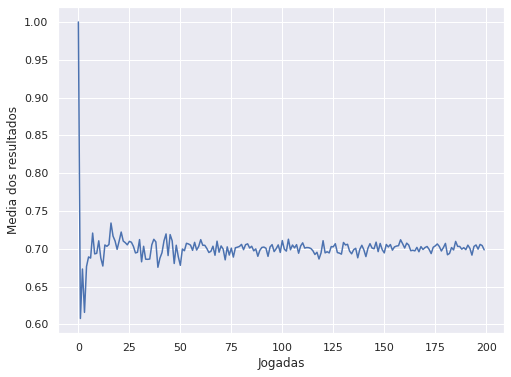

In [27]:
sns.set()
plt.figure(figsize = (8, 6))
plt.xlabel("Jogadas")
plt.ylabel("Media dos resultados")
plt.plot(final_result)
plt.show()

## De acordo com o gráfico, é possivel observar que quanto mais jogadas nos fazemos, mais a média dessas jogadas tendem a se aproximar da probabilidade esperada, no caso da moeda viciada Pr(cara/0)=.3.

# Distribuições Amostrais

In [28]:
batatas = np.arange(10, 21)

## Esboce um gráfico (histograma) para indicar a forma desta distribuição do número de batatas.

In [29]:
amostra_batatas = np.random.choice(batatas, size=10000)

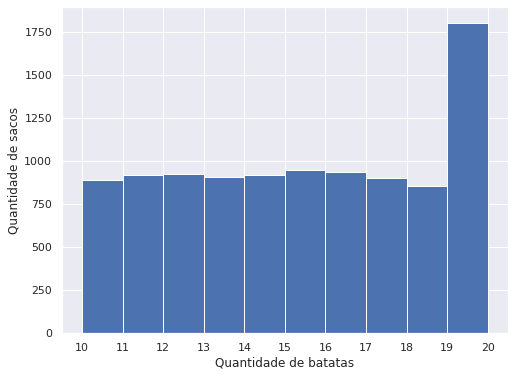

In [30]:
sns.set()
plt.figure(figsize = (8, 6))
plt.xlabel("Quantidade de batatas")
plt.ylabel("Quantidade de sacos")
plt.hist(amostra_batatas)
plt.xticks(batatas)
plt.show()

## Encontre a média, variância e desvio padrão desta distribuição. (Observe que esta é uma população discreta.)

In [31]:
print(f'Média: {np.mean(amostra_batatas)}\nVariância: {np.var(amostra_batatas)}\nDesvio Padrão: {np.sqrt(np.var(amostra_batatas))}')

Média: 14.9747
Variância: 9.87165991
Desvio Padrão: 3.141919780961952


### Sendo a população de batatas formada por valores discretos, a nossa média se aproxima de 15 batatas, a nossa variância de 10 batatas e nosso desvio padrão de 3 batatas.

## Amostras de tamanho 2

### **Estudando a amostra**

In [32]:
sample = [np.random.choice(batatas, size=2) for i in range(100)]

In [33]:
sample_mean = [np.mean(sample[i]) for i in range(len(sample))]

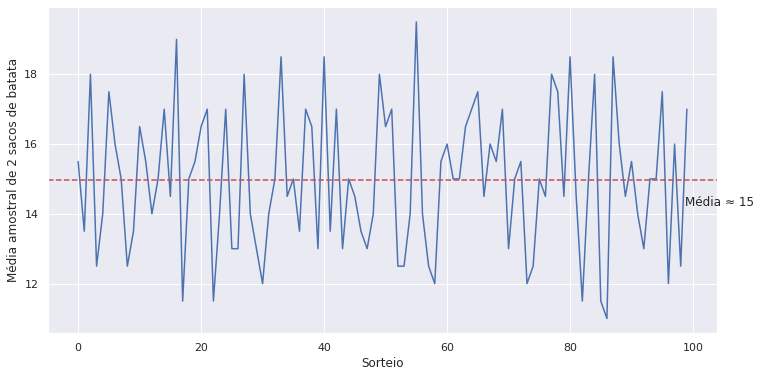

In [34]:
sns.set()
plt.figure(figsize = (12, 6))
plt.xlabel("Sorteio")
plt.ylabel("Média amostral de 2 sacos de batata")
plt.plot(sample_mean)
plt.axhline(np.mean(sample_mean), color='r', linestyle='dashed', linewidth=1.5)
min_xlim, max_xlim = plt.xlim()
plt.text(max_xlim*0.95, np.mean(sample_mean)*0.95, 'Média ≈ %d' % (round(np.mean(sample_mean), 0)))
plt.show()

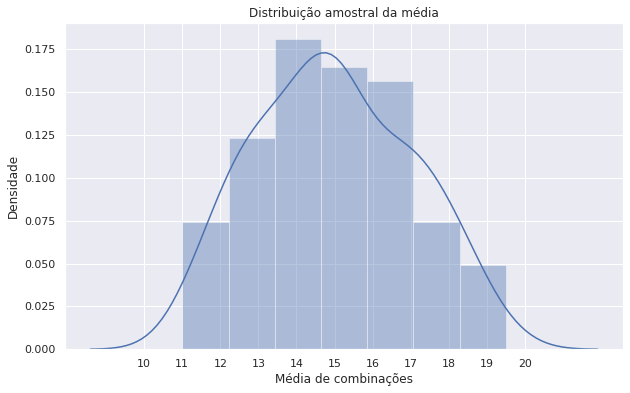

In [35]:
sns.set()
plt.figure(figsize = (10, 6))
plt.xlabel("Média de combinações")
plt.ylabel("Densidade")
plt.title("Distribuição amostral da média")
plt.xticks(batatas)
sns.distplot(sample_mean)
plt.show()

### **Estudando a população**

In [36]:
population = [(i, j) for i in batatas for j in batatas]
pop_mean = [np.mean(population[i]) for i in range(len(population))]

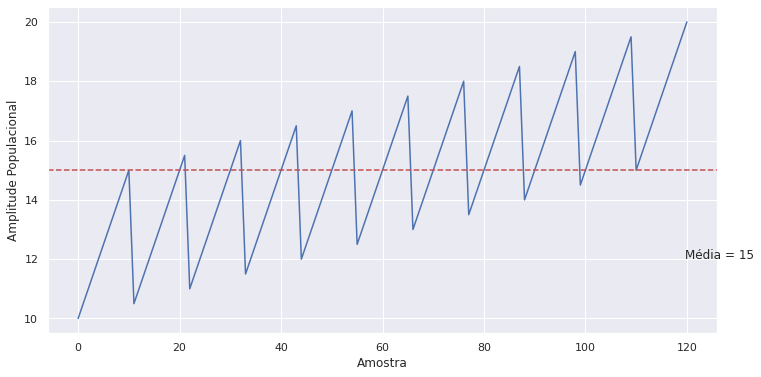

In [37]:
sns.set()
plt.figure(figsize = (12, 6))
plt.xlabel("Amostra")
plt.ylabel("Amplitude Populacional")
plt.plot(pop_mean)
plt.axhline(np.mean(pop_mean), color='r', linestyle='dashed', linewidth=1.5)
min_xlim, max_xlim = plt.xlim()
plt.text(max_xlim*0.95, np.mean(pop_mean)*0.8, 'Média = %d' % (round(np.mean(pop_mean), 0)))
plt.show()

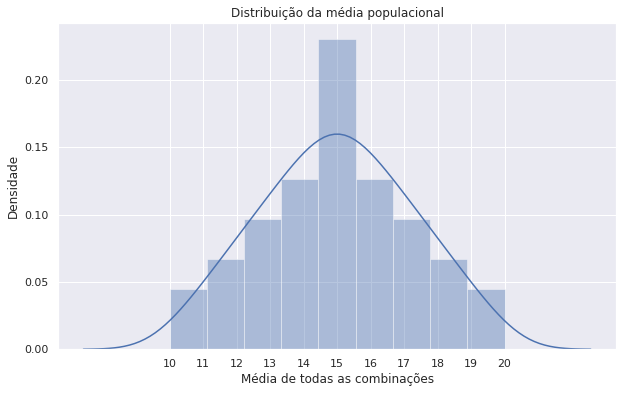

In [38]:
sns.set()
plt.figure(figsize = (10, 6))
plt.xlabel("Média de todas as combinações")
plt.ylabel("Densidade")
plt.title("Distribuição da média populacional")
plt.xticks(batatas)
sns.distplot(pop_mean)
plt.show()

## Média, variância e desvio padrão

In [39]:
print(f'\033[1mValores da Amostra\033[0m\nMédia: {np.mean(sample_mean)}\nVariância: {np.var(sample_mean)}\nDesvio Padrão: {np.sqrt(np.var(sample_mean))}\n')
print(f'\033[1mValores da População\033[0m\nMédia: {np.mean(pop_mean)}\nVariância: {np.var(pop_mean)}\nDesvio Padrão: {np.sqrt(np.var(pop_mean))}')

Valores da Amostra
Média: 14.975
Variância: 4.081875
Desvio Padrão: 2.020365066021485

Valores da População
Média: 15.0
Variância: 5.0
Desvio Padrão: 2.23606797749979


### Sendo a nossa amostra de sacos de batatas formada por valores discretos, a nossa média se aproxima de 15 batatas, a nossa variância de 5 batatas e nosso desvio padrão de 2 batatas 

## TLC

### O Teorema do Limite Central diz que para amostras aleatórias simples de tamanho n retiradas de uma população com média=μ e variância=σ² finita, a distribuição amostral da média tende a ser uma distribuição normal quanto maior for o n, tendo média=μ e variância=σ²/n.

### Observando isso nos valores gerados podemos perceber que a média amostral (=15) se aproxima da média populacional(≈15) e que a variância se aproxima de 2 uma vez que corresponde a σ²/n tendo σ²≈4 e n=2.

## Estimando a média

### Caso eu não conhecesse o modelo de probabilidade e quisesse descobrir a média da população de uma amostra de tamanho 2 eu pegaria a soma dos 2 valores extremos (inferior e superior) e dividiria por 2. Acredito que seria um bom estimador porque também se aproximaria da média populacional. Possivelmente um melhor estimador pegar as médias de n reamostragens para n>=30 e calcular as médias dessas médias, dessa forma, quanto maior for o numero de n mais estaremos aproximando da nossa média populacional.

## Amplitude
### A amplitude seria de 10, uma vez que 20-10=10

## Distribuição amostral da amplitude

### **Estudando a amostra**

In [40]:
sample_range_dist = [abs(np.diff(sample[i])[0]) for i in range(len(sample))]

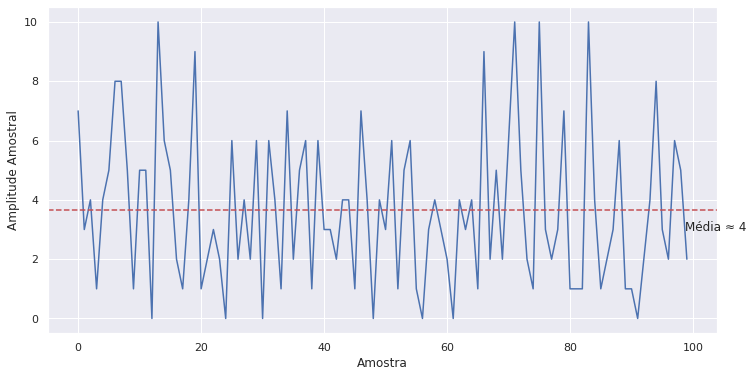

In [41]:
sns.set()
plt.figure(figsize = (12, 6))
plt.xlabel("Amostra")
plt.ylabel("Amplitude Amostral")
plt.plot(sample_range_dist)
plt.axhline(np.mean(sample_range_dist), color='r', linestyle='dashed', linewidth=1.5)
min_xlim, max_xlim = plt.xlim()
plt.text(max_xlim*0.95, np.mean(sample_range_dist)*0.8, 'Média ≈ %d' % (round(np.mean(sample_range_dist), 0)))
plt.show()

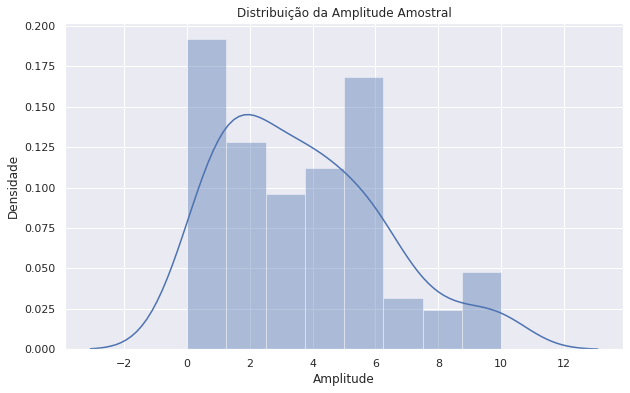

In [42]:
sns.set()
plt.figure(figsize = (10, 6))
plt.xlabel("Amplitude")
plt.ylabel("Densidade")
plt.title("Distribuição da Amplitude Amostral")
sns.distplot(sample_range_dist)
plt.show()

### **Estudando a população**

In [43]:
population = [(i, j) for i in batatas for j in batatas]
pop_range_dist = [abs(np.diff(population[i])[0]) for i in range(len(population))]

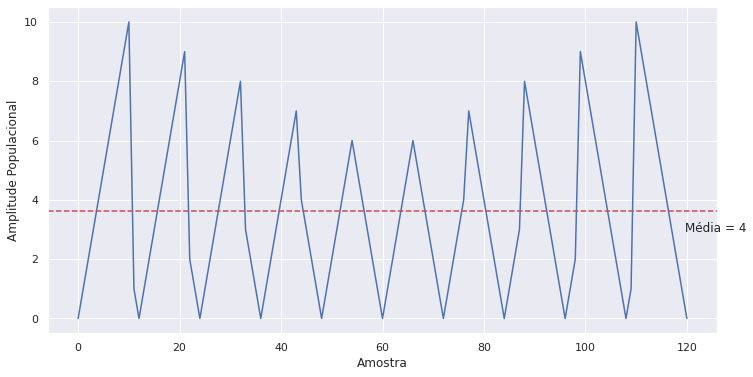

In [44]:
sns.set()
plt.figure(figsize = (12, 6))
plt.xlabel("Amostra")
plt.ylabel("Amplitude Populacional")
plt.plot(pop_range_dist)
plt.axhline(np.mean(pop_range_dist), color='r', linestyle='dashed', linewidth=1.5)
min_xlim, max_xlim = plt.xlim()
plt.text(max_xlim*0.95, np.mean(pop_range_dist)*0.8, 'Média = %d' % (round(np.mean(pop_range_dist), 0)))
plt.show()

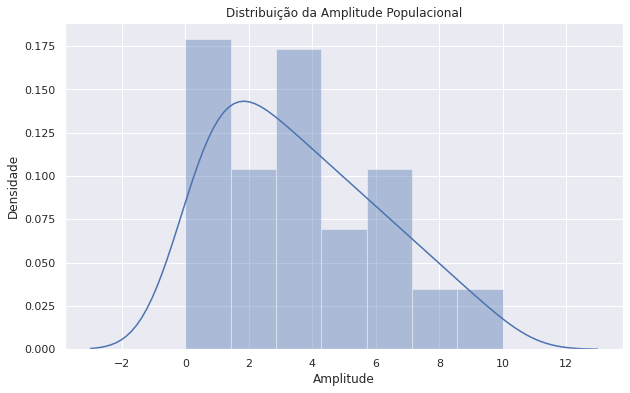

In [45]:
sns.set()
plt.figure(figsize = (10, 6))
plt.xlabel("Amplitude")
plt.ylabel("Densidade")
plt.title("Distribuição da Amplitude Populacional")
#plt.xticks(batatas)
sns.distplot(pop_range_dist)
plt.show()

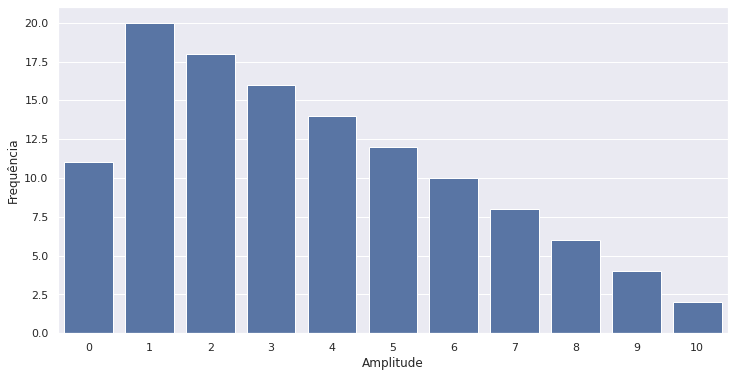

In [46]:
sns.set()
plt.figure(figsize = (12, 6))
plt.xlabel("Amplitude")
sns.countplot(pop_range_dist, color='b')
plt.ylabel("Frequência")
plt.show()

## Distribuição amostral da amplitude amostral

### Com base na análise feita a amplitude amostral parece sim ser um bom estimador da amplitude populacional, pois a média dessa amplitude converge para a media da amplitude populacional e quanto mais valores de amplitude tivermos para estimar a media da amplitude amostral mais proximo esse valor será da amplitude populacional.